In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [2]:
data = pd.read_csv('data/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_Nep_AQI_Dataset.csv')
data.shape
# data.columns

(12240, 14)

In [3]:
data.isna().sum()

Location        0
Filename        0
Year            0
Month           0
Day             0
Hour            0
AQI             0
PM2.5           0
PM10            0
O3            302
CO            580
SO2          1483
NO2           440
AQI_Class       0
dtype: int64

In [4]:
missing_by_location = data.groupby("Location").apply(lambda x: x.isna().sum())

# Count consecutive NaNs per location
def count_consecutive_nans(series):
    max_consecutive = 0
    current_count = 0

    for value in series.isna():
        if value:
            current_count += 1
            max_consecutive = max(max_consecutive, current_count)
        else:
            current_count = 0  # Reset count when a valid value appears

    return max_consecutive

consecutive_nans_by_location = data.groupby("Location").apply(lambda x: x.apply(count_consecutive_nans))

# Print results
print("Total missing values per location:\n", missing_by_location)
# print("\nMax consecutive NaNs per location:\n", consecutive_nans_by_location)

Total missing values per location:
                                Location  Filename  Year  Month  Day  Hour  \
Location                                                                    
Bengaluru                             0         0     0      0    0     0   
Biratnagar, Nepal                     0         0     0      0    0     0   
Dimapur, Nagaland                     0         0     0      0    0     0   
ITO, Delhi                            0         0     0      0    0     0   
Knowledge park, Greater Noida         0         0     0      0    0     0   
Mumbai                                0         0     0      0    0     0   
New Ind Town, Faridabad               0         0     0      0    0     0   
Tamil Nadu                            0         0     0      0    0     0   

                               AQI  PM2.5  PM10   O3   CO   SO2  NO2  \
Location                                                               
Bengaluru                        0      0     0  

C:\Users\Yuval\AppData\Local\Temp\ipykernel_12392\319731891.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_location = data.groupby("Location").apply(lambda x: x.isna().sum())
C:\Users\Yuval\AppData\Local\Temp\ipykernel_12392\319731891.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_nans_by_location = data.groupby("Location").apply(lambda x: x.apply(count_consecutive_nans))


In [5]:
data['Location'].unique()

array(['Biratnagar, Nepal', 'Tamil Nadu', 'Mumbai',
       'Knowledge park, Greater Noida', 'New Ind Town, Faridabad',
       'ITO, Delhi', 'Bengaluru', 'Dimapur, Nagaland'], dtype=object)

In [6]:
data['Location'].value_counts()

Location
Mumbai                           2203
Biratnagar, Nepal                2171
ITO, Delhi                       2168
Bengaluru                        1926
Tamil Nadu                       1540
Knowledge park, Greater Noida    1241
New Ind Town, Faridabad           641
Dimapur, Nagaland                 350
Name: count, dtype: int64

In [6]:
def normalize_filename(filename):
    splits = filename.split('.')
    return splits[0] + '.' + splits[1][:2]

data['Normalized_Filename'] = data['Filename'].apply(normalize_filename)

In [26]:
# data['Normalized_Filename'].unique()

In [9]:
data[~data['Normalized_Filename'].str.contains('.jp')].count()

Location               12078
Filename               12078
Year                   12078
Month                  12078
Day                    12078
Hour                   12078
AQI                    12078
PM2.5                  12078
PM10                   12078
O3                     11776
CO                     11498
SO2                    10595
NO2                    11638
AQI_Class              12078
Normalized_Filename    12078
dtype: int64

In [28]:
data.head(10)

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class,Normalized_Filename
0,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-9.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
1,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-8.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
2,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-7.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
3,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-6.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
4,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-5.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
5,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-4.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
6,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-3.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
7,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-2.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
8,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-18.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00
9,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-17.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,BRI_Un_2023-02-02- 12.00


In [27]:
data.Location.unique()

array(['Biratnagar, Nepal', 'Tamil Nadu', 'Mumbai',
       'Knowledge park, Greater Noida', 'New Ind Town, Faridabad',
       'ITO, Delhi', 'Bengaluru', 'Dimapur, Nagaland'], dtype=object)

In [28]:
# from geopy.geocoders import Nominatim

# # Initialize geolocator
# geolocator = Nominatim(user_agent="geoapi")

# # List of locations
# locations = [
#     "ITO, Delhi",
#     "Dimapur, Nagaland",
#     "Spice Garden, Bengaluru",
#     "Knowledge Park III, Greater Noida",
#     "New Ind Town, Faridabad",
#     "Borivali East, Mumbai",
#     "Oragadam, Tamil Nadu"
# ]

# # Geocode each location
# coordinates = []
# for loc in locations:
#     location = geolocator.geocode(loc)
#     if location:
#         coordinates.append((loc, location.latitude, location.longitude))
#     else:
#         coordinates.append((loc, None, None))

# # Print results
# for loc, lat, lon in coordinates:
#     print(f"Location: {loc}, Latitude: {lat}, Longitude: {lon}")


Location: ITO, Delhi, Latitude: 28.6281909, Longitude: 77.2410437
Location: Dimapur, Nagaland, Latitude: 25.904137849999998, Longitude: 93.7177608788519
Location: Spice Garden, Bengaluru, Latitude: 12.9570571, Longitude: 77.7091042
Location: Knowledge Park III, Greater Noida, Latitude: 28.478588, Longitude: 77.4813689
Location: New Ind Town, Faridabad, Latitude: None, Longitude: None
Location: Borivali East, Mumbai, Latitude: 19.2267228, Longitude: 72.8619328
Location: Oragadam, Tamil Nadu, Latitude: 12.8386457, Longitude: 79.9452346


In [29]:
coordinates = [
    ("ITO, Delhi", 28.6284, 77.2425),
    ("Dimapur, Nagaland", 25.9094, 93.7276),
    ("Spice Garden, Bengaluru", 12.9724, 77.5807),
    ("Knowledge Park III, Greater Noida", 28.4674, 77.503),
    ("New Ind Town, Faridabad", 28.4089, 77.3178),
    ("Borivali East, Mumbai", 19.2300, 72.8602),
    ("Oragadam, Tamil Nadu", 12.8321, 79.9943)
]

In [31]:
def map_locations(data, coordinates):
    lat = [0] * len(data['Location'])
    lon = [0] * len(data['Location'])
    for i, location in enumerate(data['Location']):
        for j, coord in enumerate(coordinates):
            if location in coord[0]:
                lat[i] = coord[1]
                lon[i] = coord[2]
                
    return lat, lon

lat, lon = map_locations(data, coordinates)

In [32]:
data['Latitude'] = lat
data['Longitude'] = lon

<Axes: >

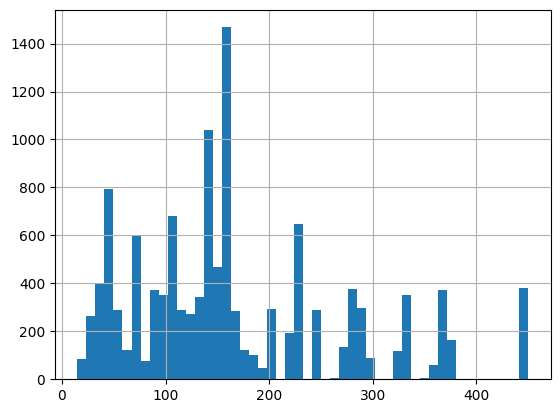

In [44]:
# plt.plot(data['AQI'])
data['AQI'].hist(bins=50)

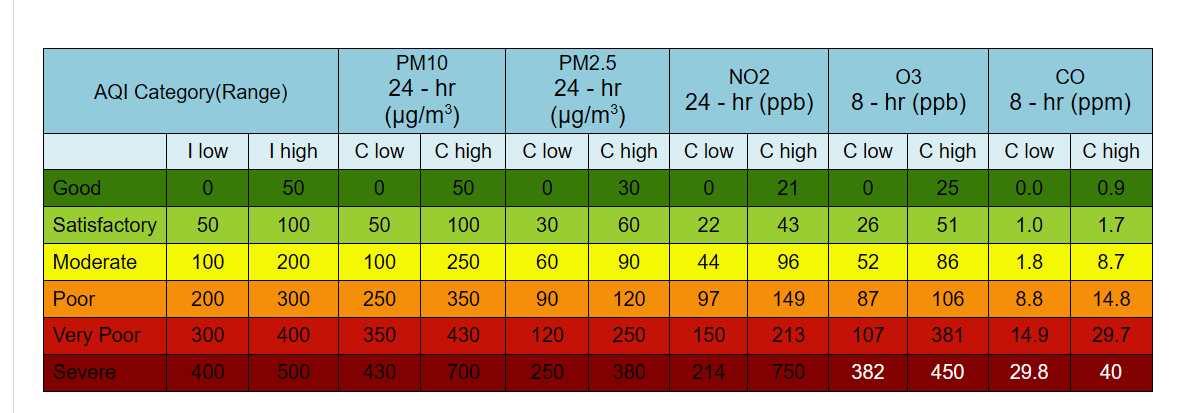

https://safar.tropmet.res.in/AQI-47-12-Details

In [47]:
def map_aqi(x):
    if x <= 50:
        return 'Good'
    elif x <= 100:
        return 'Satisfactory'
    elif x <= 200:
        return 'Moderate'
    elif x <= 300:
        return 'Poor'
    elif x <= 400:
        return 'Very Poor'
    else:
        return 'Severe'
    
data['AQI_Class2'] = data['AQI'].apply(map_aqi)

In [57]:
for i in data['Location'].unique():
    print(i)
    print("new AQI bands")
    print()
    print(data[data['Location']==i]['AQI_Class2'].value_counts())
    print()
    print("old AQI bands")
    print(data[data['Location']==i]['AQI_Class'].value_counts())
    print("\n")


Biratnagar, Nepal
new AQI bands

AQI_Class2
Moderate        1887
Satisfactory     284
Name: count, dtype: int64

old AQI bands
AQI_Class
d_Unhealthy                         1153
c_Unhealthy_for_Sensitive_Groups     734
b_Moderate                           284
Name: count, dtype: int64


Tamil Nadu
new AQI bands

AQI_Class2
Moderate        758
Good            667
Satisfactory    115
Name: count, dtype: int64

old AQI bands
AQI_Class
a_Good                              667
c_Unhealthy_for_Sensitive_Groups    495
d_Unhealthy                         263
b_Moderate                          115
Name: count, dtype: int64


Mumbai
new AQI bands

AQI_Class2
Moderate        1600
Poor             264
Good             252
Satisfactory      87
Name: count, dtype: int64

old AQI bands
AQI_Class
d_Unhealthy                         951
c_Unhealthy_for_Sensitive_Groups    649
e_Very_Unhealthy                    264
a_Good                              252
b_Moderate                           87
Name: co

In [ ]:
## Resnet 18, 50, 108
## VGG 16 19
## EfficentNet
## InceptionNet
## Vision Transformer (ViT)
## MobileNet
## MobileNetV3



In [4]:
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapi")

# List of locations

# Geocode each location
coordinates = []
for loc in data['Location'].unique():
    location = geolocator.geocode(loc)
    if location:
        coordinates.append((loc, location.latitude, location.longitude))
    else:
        coordinates.append((loc, None, None))

# Print results
for loc, lat, lon in coordinates:
    print(f"Location: {loc}, Latitude: {lat}, Longitude: {lon}")


Location: Biratnagar, Nepal, Latitude: 26.4623007, Longitude: 87.281617
Location: Tamil Nadu, Latitude: 10.9094334, Longitude: 78.3665347
Location: Mumbai, Latitude: 19.054999, Longitude: 72.8692035
Location: Knowledge park, Greater Noida, Latitude: 28.4568669, Longitude: 77.50005402757225
Location: New Ind Town, Faridabad, Latitude: None, Longitude: None
Location: ITO, Delhi, Latitude: 28.6281909, Longitude: 77.2410437
Location: Bengaluru, Latitude: 12.98815675, Longitude: 77.62260003796
Location: Dimapur, Nagaland, Latitude: 25.904137849999998, Longitude: 93.7177608788519


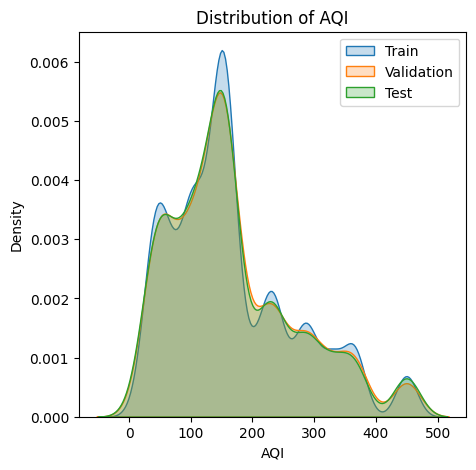

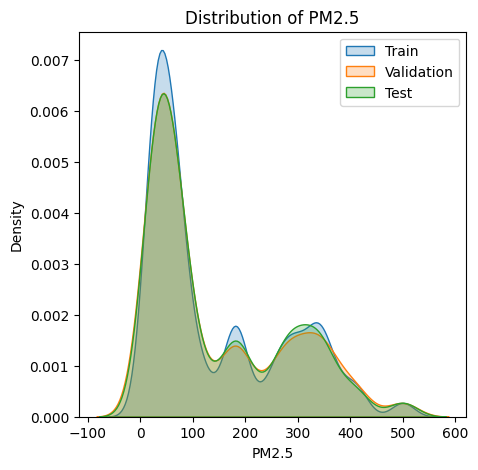

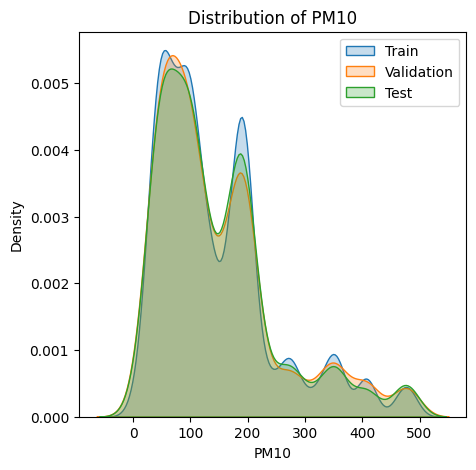

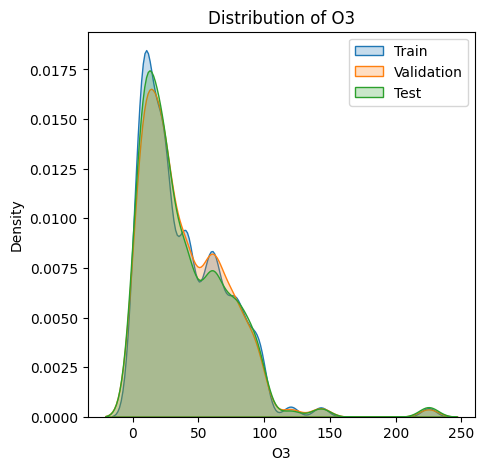

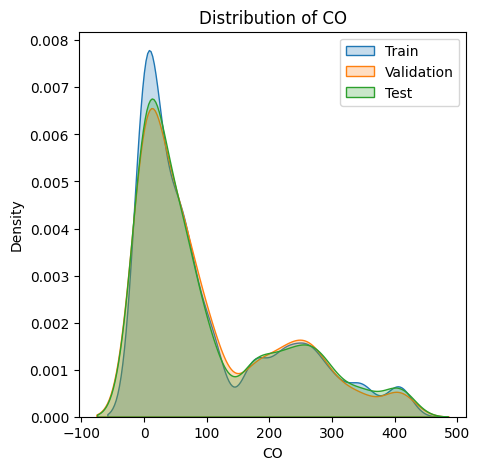

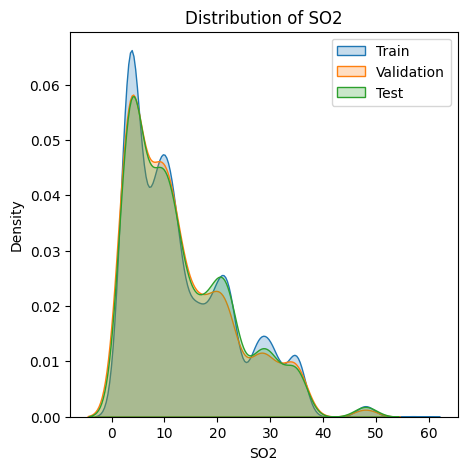

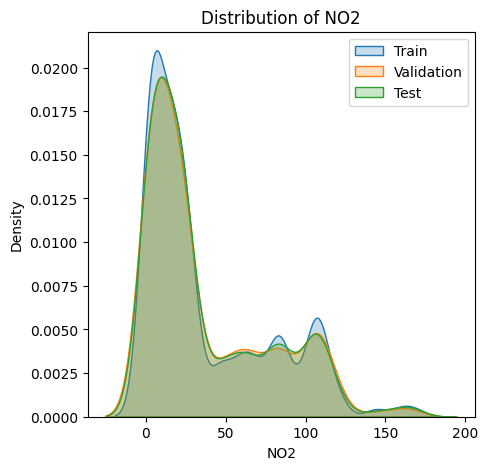

In [12]:
dataset_path  = 'dataset'

train_csv = pd.read_csv(os.path.join(dataset_path, 'train_data.csv'))
val_csv = pd.read_csv(os.path.join(dataset_path, 'val_data.csv'))
test_csv = pd.read_csv(os.path.join(dataset_path, 'test_data.csv'))

def plot_distributions(train, val, test, column):
    plt.figure(figsize=(5, 5))
    sns.kdeplot(train[column].dropna(), label='Train', fill=True)
    sns.kdeplot(val[column].dropna(), label='Validation', fill=True)
    sns.kdeplot(test[column].dropna(), label='Test', fill=True)
    plt.title(f"Distribution of {column}")
    plt.legend()
    plt.show()

# Check for key pollutant distributions
for col in ['AQI', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']:
    plot_distributions(train_csv, val_csv, test_csv, col)


In [17]:
train_locations = set(train_csv['Location'].unique())
val_locations = set(val_csv['Location'].unique())
test_locations = set(test_csv['Location'].unique())

# Check for overlap
print("Train-Val Overlap:", train_locations & val_locations)
print("Train-Test Overlap:", train_locations & test_locations)
print("Val-Test Overlap:", val_locations & test_locations)


Train-Val Overlap: {'Biratnagar, Nepal', 'Dimapur, Nagaland', 'Mumbai', 'Bengaluru', 'Tamil Nadu', 'Knowledge park, Greater Noida', 'New Ind Town, Faridabad', 'ITO, Delhi'}
Train-Test Overlap: {'Biratnagar, Nepal', 'Dimapur, Nagaland', 'Mumbai', 'Bengaluru', 'Tamil Nadu', 'Knowledge park, Greater Noida', 'New Ind Town, Faridabad', 'ITO, Delhi'}
Val-Test Overlap: {'Biratnagar, Nepal', 'Dimapur, Nagaland', 'Mumbai', 'Bengaluru', 'Tamil Nadu', 'Knowledge park, Greater Noida', 'New Ind Town, Faridabad', 'ITO, Delhi'}


<Figure size 1000x600 with 0 Axes>

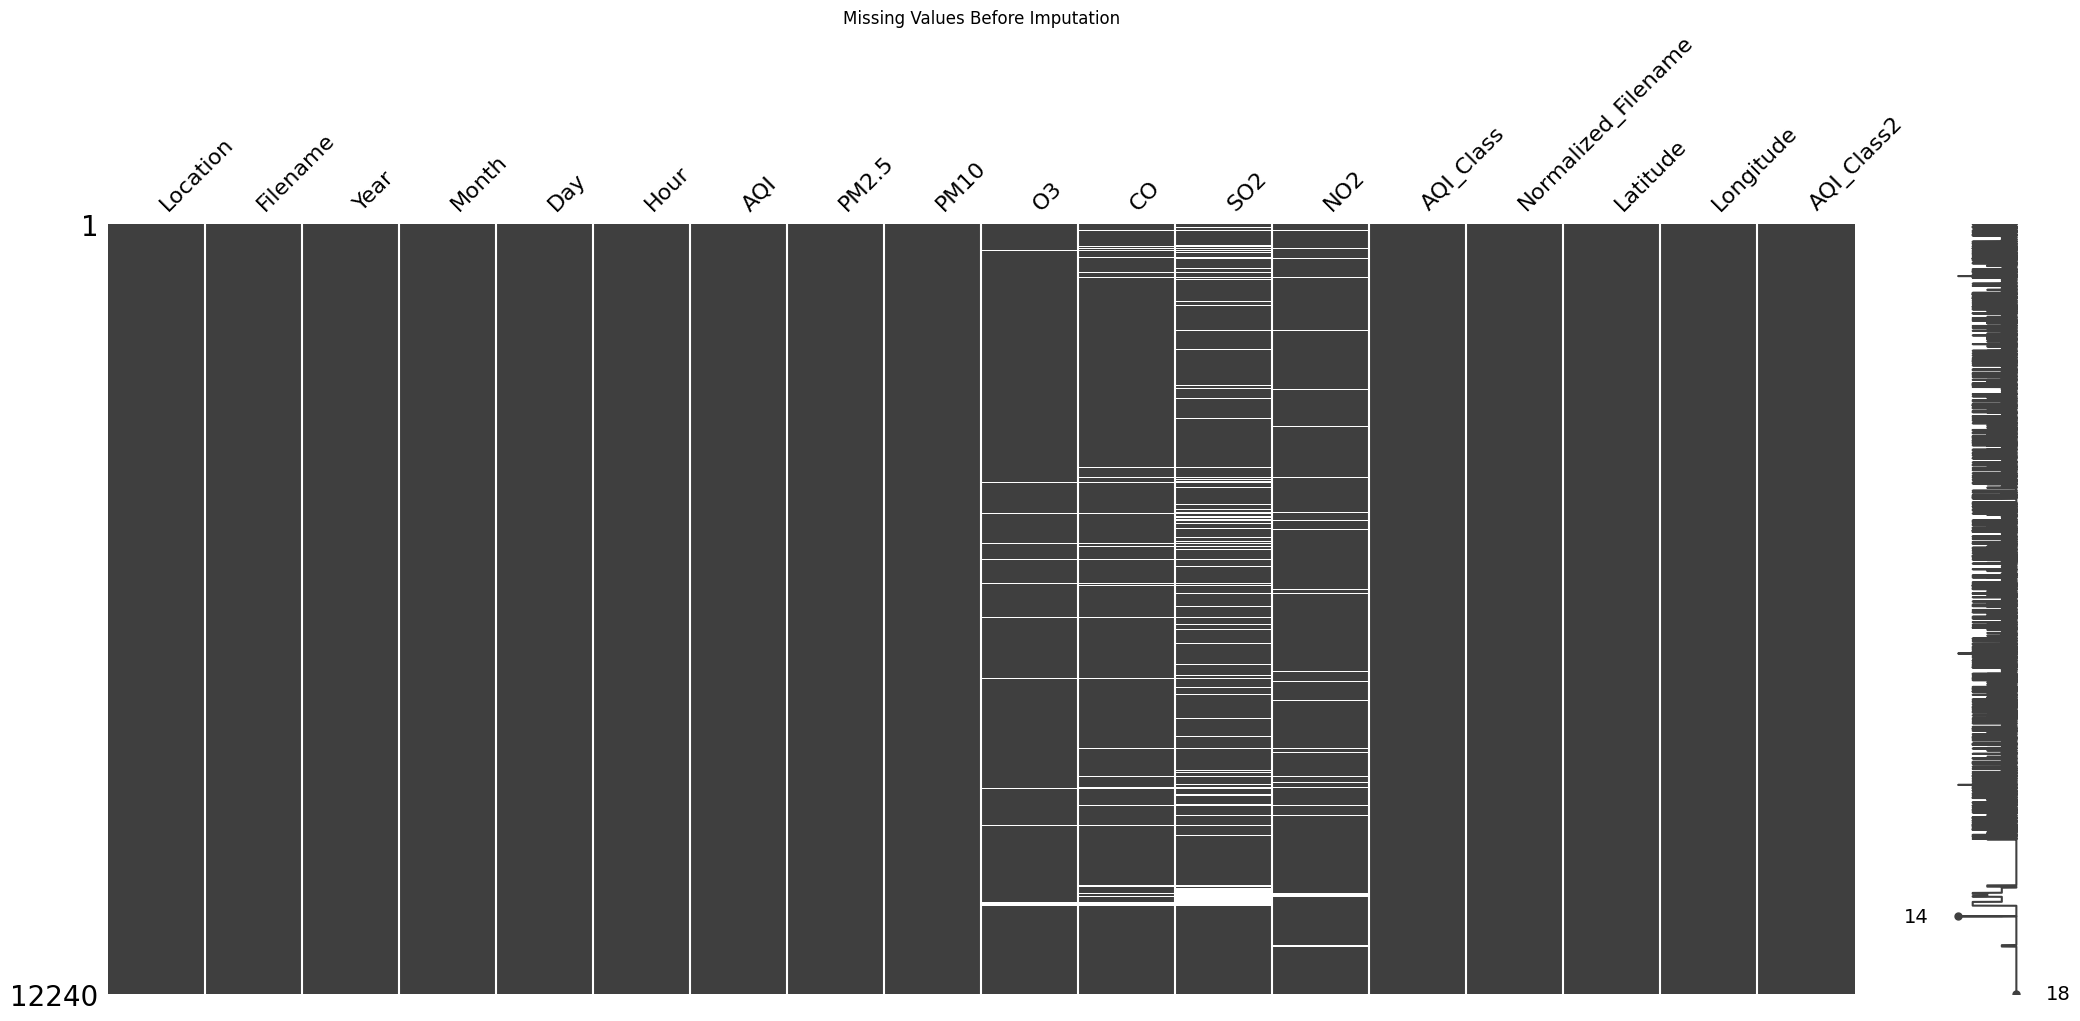

In [18]:

# Combine for visualization
combined_df = pd.concat([train_csv, val_csv, test_csv], ignore_index=True)

# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(combined_df)
plt.title("Missing Values Before Imputation")
plt.show()


In [19]:
from sklearn.impute import KNNImputer

# Step 1: Apply Linear Interpolation for small gaps
# combined_df.interpolate(method='linear', inplace=True)

# Step 2: Apply KNN Imputation for large missing blocks
knn_imputer = KNNImputer(n_neighbors=5)
combined_df[['SO2', 'NO2', 'O3', 'CO']] = knn_imputer.fit_transform(combined_df[['SO2', 'NO2', 'O3', 'CO']])

<Figure size 1000x600 with 0 Axes>

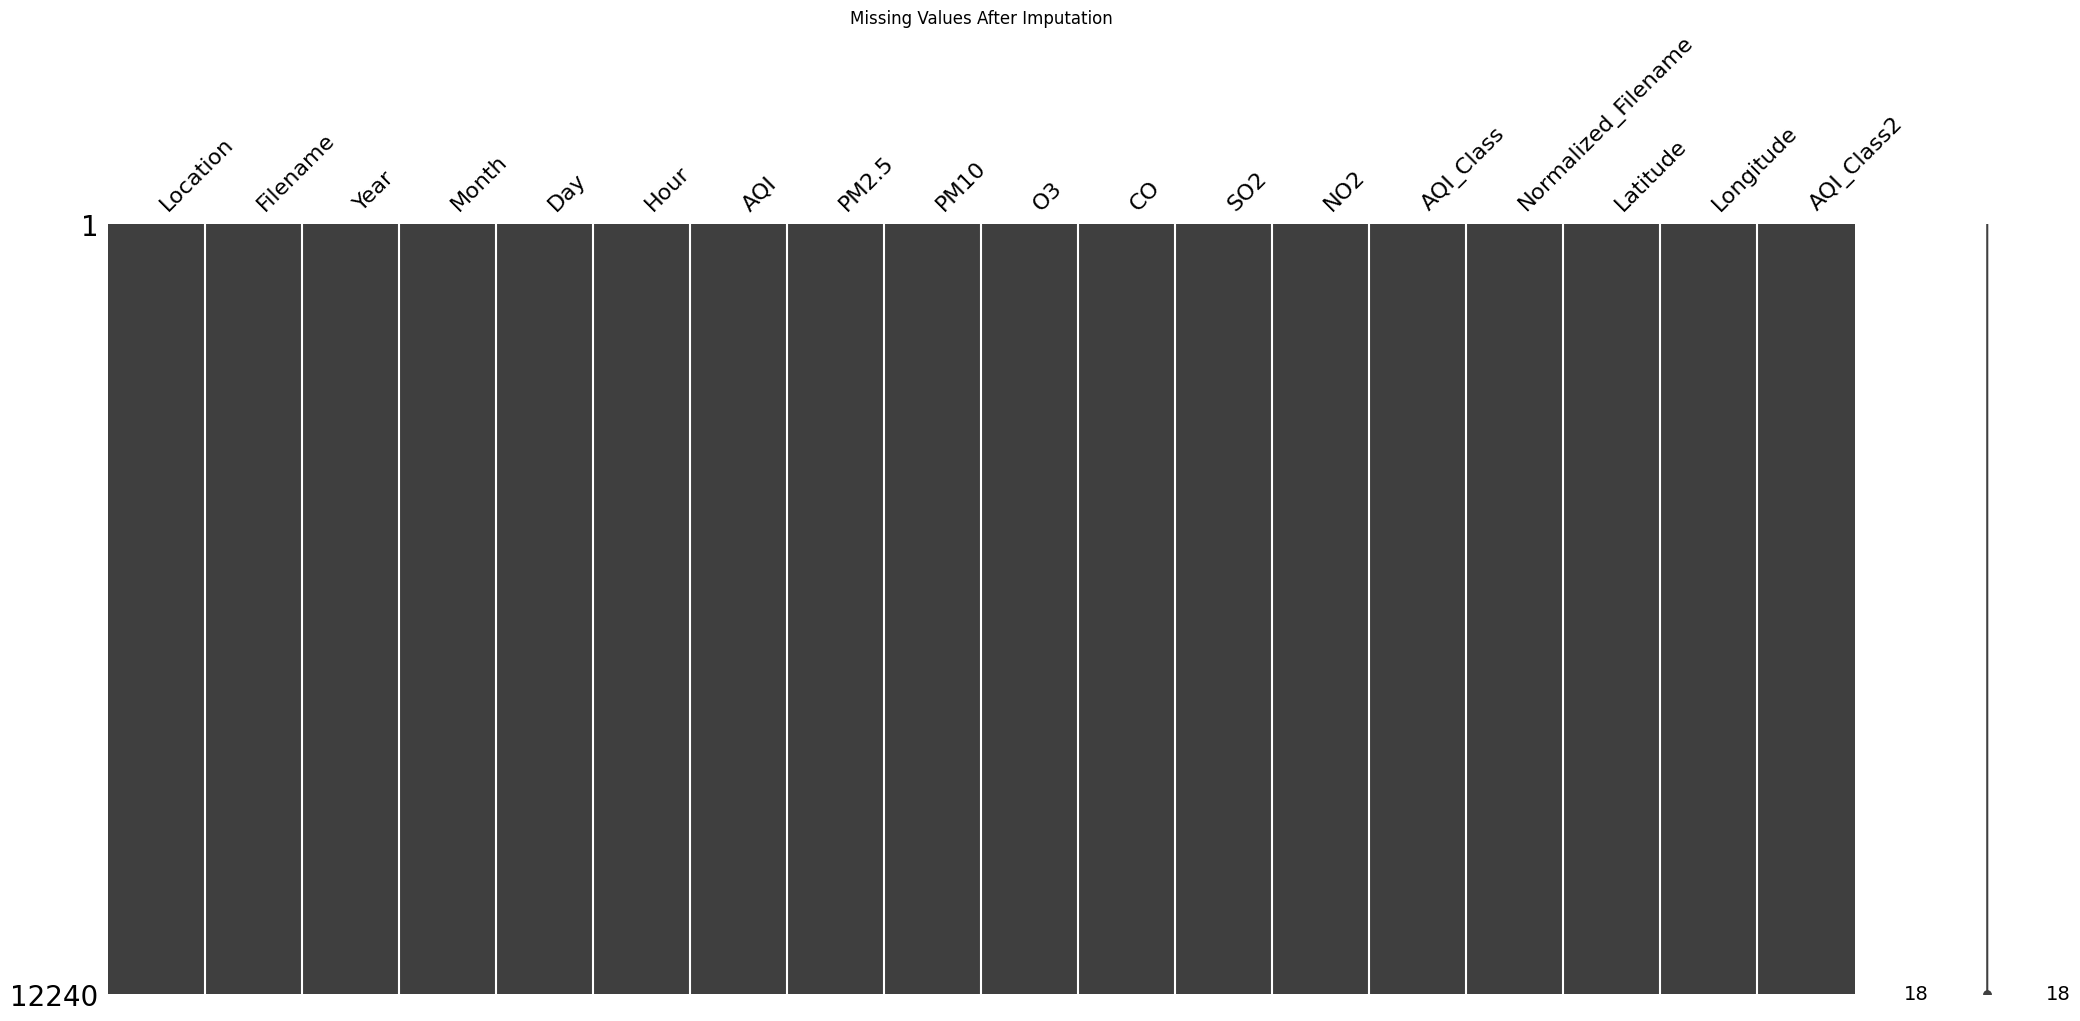

In [20]:
# Visualize after imputation
plt.figure(figsize=(10, 6))
msno.matrix(combined_df)
plt.title("Missing Values After Imputation")
plt.show()


In [21]:
train_csv = combined_df.iloc[:len(train_csv)]
val_csv = combined_df.iloc[len(train_csv):len(train_csv) + len(val_csv)]
test_csv = combined_df.iloc[len(train_csv) + len(val_csv):]

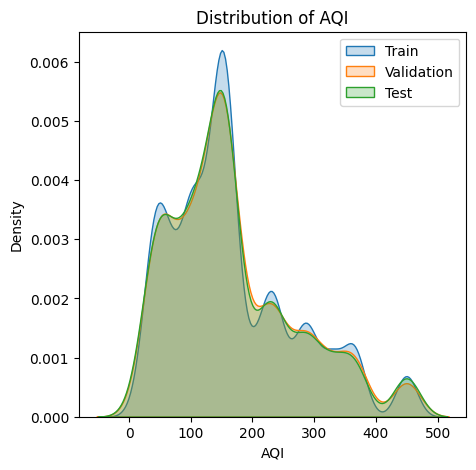

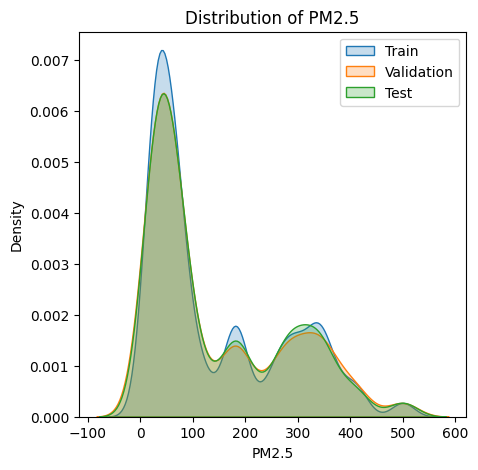

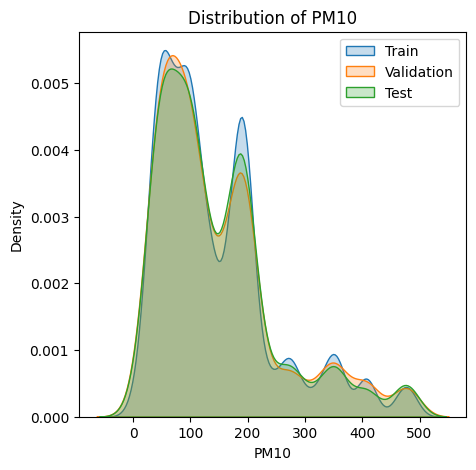

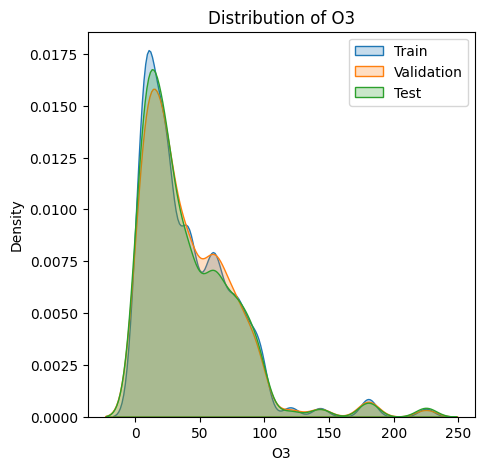

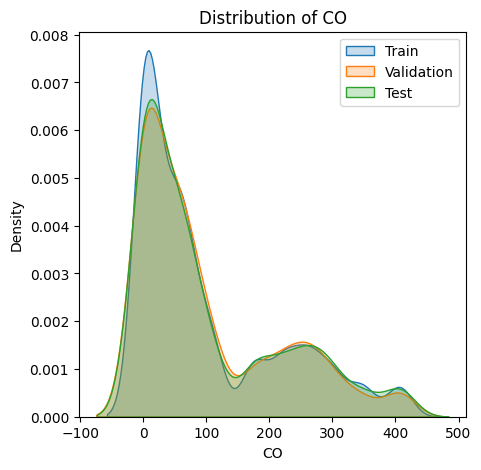

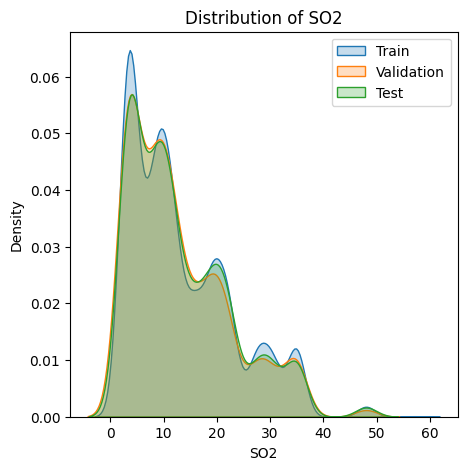

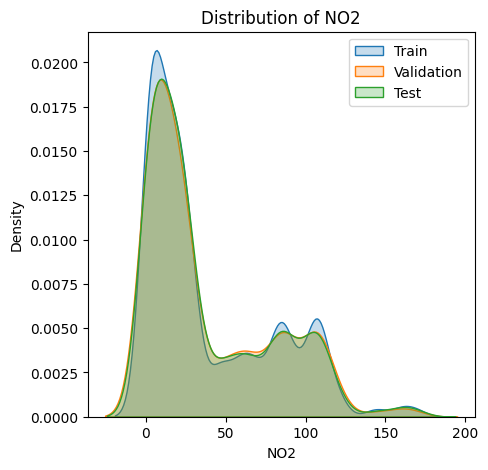

In [22]:
for col in ['AQI', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']:
    plot_distributions(train_csv, val_csv, test_csv, col)